In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/orcas_query_dom.tsv",sep="\t")
df.head()

,Unnamed: 0,qid,query,did,url,Level_1,Level_2,Label,data_type,domain_names,query_url
0,0,3754704,colonialism in australia,D3262459,https://www.awm.gov.au/articles/atwar/colonial,Abstain,Abstain,Abstain,train,awm au,query : colonialism in australia url : awm au
1,1,12550690,hemontona,D204862,https://en.wikipedia.org/wiki/Hematoma,Abstain,Factual,Factual,validation,en wikipedia,query : hemontona url : en wikipedia
2,2,11590545,maglite parts,D3031498,http://maglite.com/,Navigational,Abstain,Navigational,validation,maglite,query : maglite parts url : maglite
3,3,4594612,intel.idbi bank .com,D201597,https://inet.idbibank.co.in/,Navigational,Abstain,Navigational,train,inet idbibank co in,query : intel.idbi bank .com url : inet idbiba...
4,4,9651240,how do landlords report to credit bureaus,D1786282,http://www.experian.com/rentbureau/rental-repo...,Abstain,Instrumental,Instrumental,train,experian,query : how do landlords report to credit bure...


In [ ]:
df = df[pd.notnull(df['query'])]
df.head()

,Unnamed: 0,qid,query,did,url,Level_1,Level_2,Label,data_type,domain_names,query_url
0,0,3754704,colonialism in australia,D3262459,https://www.awm.gov.au/articles/atwar/colonial,Abstain,Abstain,Abstain,train,awm au,query : colonialism in australia url : awm au
1,1,12550690,hemontona,D204862,https://en.wikipedia.org/wiki/Hematoma,Abstain,Factual,Factual,validation,en wikipedia,query : hemontona url : en wikipedia
2,2,11590545,maglite parts,D3031498,http://maglite.com/,Navigational,Abstain,Navigational,validation,maglite,query : maglite parts url : maglite
3,3,4594612,intel.idbi bank .com,D201597,https://inet.idbibank.co.in/,Navigational,Abstain,Navigational,train,inet idbibank co in,query : intel.idbi bank .com url : inet idbiba...
4,4,9651240,how do landlords report to credit bureaus,D1786282,http://www.experian.com/rentbureau/rental-repo...,Abstain,Instrumental,Instrumental,train,experian,query : how do landlords report to credit bure...


In [ ]:

col = ['Level_1', 'query_url','data_type']
df = df[col]
df.head()


,Level_1,query_url,data_type
0,Abstain,query : colonialism in australia url : awm au,train
1,Abstain,query : hemontona url : en wikipedia,validation
2,Navigational,query : maglite parts url : maglite,validation
3,Navigational,query : intel.idbi bank .com url : inet idbiba...,train
4,Abstain,query : how do landlords report to credit bure...,train


In [ ]:
df.columns

Index(['Level_1', 'query_url', 'data_type'], dtype='object')

In [ ]:
df['category_id'] = df['Level_1'].factorize()[0]

In [ ]:
df.head()

,Level_1,query_url,data_type,category_id
0,Abstain,query : colonialism in australia url : awm au,train,0
1,Abstain,query : hemontona url : en wikipedia,validation,0
2,Navigational,query : maglite parts url : maglite,validation,1
3,Navigational,query : intel.idbi bank .com url : inet idbiba...,train,1
4,Abstain,query : how do landlords report to credit bure...,train,0


In [ ]:
category_id_df = df[['Level_1', 'category_id']].drop_duplicates().sort_values('category_id')

In [ ]:
category_to_id = dict(category_id_df.values)

In [ ]:
category_to_id

In [ ]:
id_to_category = dict(category_id_df[['category_id', 'Level_1']].values)
id_to_category

{0: 'Abstain', 1: 'Navigational', 2: 'Transactional'}

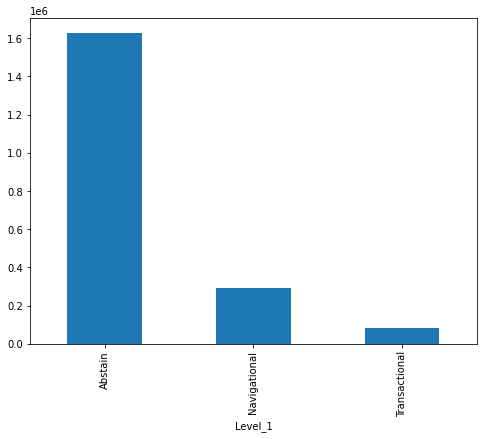

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Level_1').query_url.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2))
print(tfidf)

arr = df["query_url"].to_numpy()
features = tfidf.fit_transform(arr)
labels = df.category_id
features.shape

df_train = df[df["data_type"]== "train"]
df_valid = df[df["data_type"]== "validation"]
df_valid.head()
arr_train = df_train["query_url"].to_numpy()
X_train = tfidf.fit_transform(arr_train)
print(type(X_train))
arr_test = df_valid["query_url"].to_numpy()
X_test = tfidf.transform(arr_test)
print(X_test)
y_train = df_train.category_id
y_test = df_valid.category_id
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)
labels = df.category_id
features.shape
labels



TfidfVectorizer(encoding='latin-1', ngram_range=(1, 2), sublinear_tf=True)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1934872)	0.11296341600552692
  (0, 1784923)	0.11276286432222468
  (0, 1756607)	0.03848465106398574
  (0, 1317479)	0.5615821524485458
  (0, 1242323)	0.03848465106398574
  (0, 701970)	0.5615821524485458
  (0, 701969)	0.5615821524485458
  (0, 514701)	0.11317741275010146
  (0, 514464)	0.11237881355551094
  (1, 1809072)	0.4183963393516157
  (1, 1756607)	0.03136497441415012
  (1, 1341184)	0.4359486742219647
  (1, 1242323)	0.03136497441415012
  (1, 1145442)	0.27786311534797903
  (1, 1145321)	0.25273431204223407
  (1, 921777)	0.701315328555517
  (2, 1832514)	0.25792236379013184
  (2, 1756607)	0.027257408515242543
  (2, 1606015)	0.22832875321488946
  (2, 1605915)	0.21588778108301854
  (2, 1518012)	0.25605255145811956
  (2, 1295298)	0.25219720881106766
  (2, 1242323)	0.027257408515242543
  (2, 1102959)	0.32680753271004215
  (2, 1102573)	0.14857433862563185
  :	:
  (399996, 14759

0          0
1          0
2          1
3          1
4          0
          ..
1999995    0
1999996    0
1999997    1
1999998    1
1999999    0
Name: category_id, Length: 1999998, dtype: int64

In [ ]:
import joblib

joblib.dump(tfidf, '/content/drive/MyDrive/tfidf.pkl')

['/content/drive/MyDrive/tfidf_lr_1l_dom.pkl']

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean=False)
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)
joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')

['/content/drive/MyDrive/scaler_lr_1l_do.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
model = LinearSVC()
#model = LogisticRegression()
model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


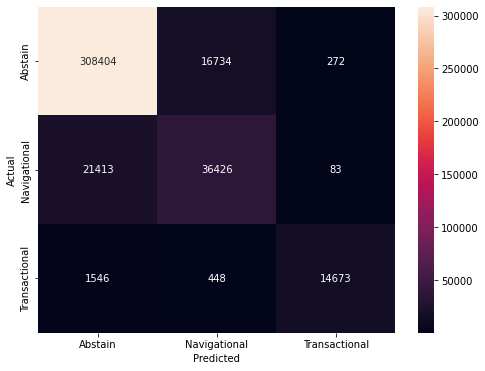

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Level_1.values, yticklabels=category_id_df.Level_1.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import joblib
filename = '/content/drive/MyDrive/model_svm.sav'
joblib.dump(model, filename)


['/content/drive/MyDrive/model_svc_lr_fl_do.sav']

In [ ]:
import joblib
loaded_model = joblib.load('/content/drive/MyDrive/model_svm.sav')
y_pr = loaded_model.predict(X_test_stand)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pr, 
                                    target_names=df['Level_1'].unique()))

               precision    recall  f1-score   support

      Abstain       0.93      0.95      0.94    325410
 Navigational       0.68      0.63      0.65     57922
Transactional       0.98      0.88      0.93     16667

     accuracy                           0.90    399999
    macro avg       0.86      0.82      0.84    399999
 weighted avg       0.90      0.90      0.90    399999



In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = RandomizedSearchCV(model, space, scoring='accuracy', cv=cv,verbose=3)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
